In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step 1: Data Preparation
data = pd.read_csv("C:\\Users\\Varshini\\Documents\\bankcustomerchurn.csv")

In [3]:
print(data)

     RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0            1    15634602   Hargrave          619    France  Female   42   
1            2    15647311       Hill          608     Spain  Female   41   
2            3    15619304       Onio          502    France  Female   42   
3            4    15701354       Boni          699    France  Female   39   
4            5    15737888   Mitchell          850     Spain  Female   43   
..         ...         ...        ...          ...       ...     ...  ...   
795        796    15686870       Ball          761   Germany    Male   36   
796        797    15668747      Virgo          702    France  Female   46   
797        798    15766908  Trevisani          488   Germany    Male   32   
798        799    15570134   Padovano          683    France  Female   35   
799        800    15567367        Tao          601   Germany  Female   42   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        800 non-null    int64  
 1   CustomerId       800 non-null    int64  
 2   Surname          800 non-null    object 
 3   CreditScore      800 non-null    int64  
 4   Geography        800 non-null    object 
 5   Gender           800 non-null    object 
 6   Age              800 non-null    int64  
 7   Tenure           800 non-null    int64  
 8   Balance          800 non-null    float64
 9   NumOfProducts    800 non-null    int64  
 10  HasCrCard        800 non-null    int64  
 11  IsActiveMember   800 non-null    int64  
 12  EstimatedSalary  800 non-null    float64
 13  Exited           800 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 87.6+ KB


In [5]:
data.describe()

RowNumber    CustomerId  CreditScore         Age      Tenure  \
count   800.0000  8.000000e+02   800.000000  800.000000  800.000000   
mean    400.5000  1.569219e+07   649.695000   38.860000    5.042500   
std     231.0844  7.158805e+04    99.298942   10.287502    2.948145   
min       1.0000  1.556611e+07   376.000000   18.000000    0.000000   
25%     200.7500  1.563216e+07   582.000000   32.000000    2.000000   
50%     400.5000  1.569257e+07   656.000000   37.000000    5.000000   
75%     600.2500  1.575179e+07   722.500000   44.000000    8.000000   
max     800.0000  1.581536e+07   850.000000   82.000000   10.000000   

             Balance  NumOfProducts   HasCrCard  IsActiveMember  \
count     800.000000     800.000000  800.000000      800.000000   
mean    77488.718287       1.527500    0.707500        0.505000   
std     62724.659857       0.574157    0.455195        0.500288   
min         0.000000       1.000000    0.000000        0.000000   
25%         0.000000       1.000000    0.000000        0.000000   
50%     98581.950000       1.000000    1.000000        1.000000   
75%    128478.925000       2.000000    1.000000        1.000000   
max    213146.200000       4.000000    1.000000        1.000000   

       EstimatedSalary      Exited  
count       800.000000  800.000000  
mean      99125.108075    0.203750  
std       56979.191541    0.403037  
min         371.050000    0.000000  
25%       50336.007500    0.000000  
50%       98733.305000    0.000000  
75%      146808.280000    0.000000  
max      199725.390000    1.000000

In [6]:
a1 = data.shape
print(a1)

(800, 14)


In [7]:
a2 = data.isnull().sum()
print(a2)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
a3 = data.nunique()
print(a3)

RowNumber          800
CustomerId         800
Surname            625
CreditScore        336
Geography            3
Gender               2
Age                 58
Tenure              11
Balance            517
NumOfProducts        4
HasCrCard            2
IsActiveMember       2
EstimatedSalary    800
Exited               2
dtype: int64


In [9]:
# Preprocessing (handle missing values, encode categorical variables, etc.)
data = data.drop(["RowNumber", "CustomerId", "Surname","Geography","Gender"], axis = 1)

In [11]:
# Review the top rows of what is left of the data frame
print(data.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  


In [13]:
# Check variable data types
print(data.dtypes)

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [18]:
import numpy as np
import matplotlib.pyplot as plt

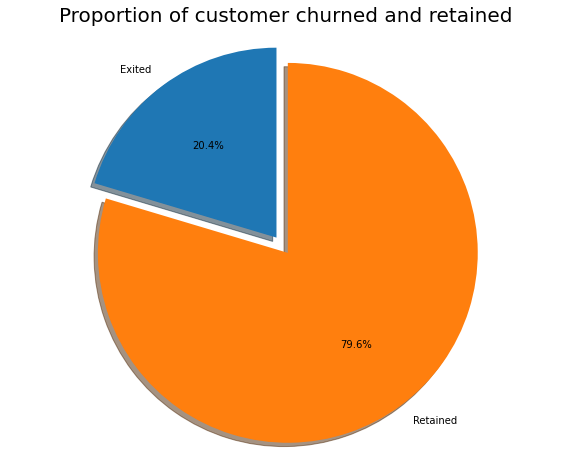

In [22]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained",size=20)
plt.show()

In [23]:
# Step 2: Data Splitting
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target variable (Churn status)

In [24]:
# print(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 4: Create the Random Forest Model
# Initialize the Random Forest classifier with appropriate hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [26]:
# Step 5: Make Predictions
y_pred = rf_model.predict(X_test)

In [27]:
# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [28]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.85625


In [29]:
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[124   2]
 [ 21  13]]


In [30]:
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       126
           1       0.87      0.38      0.53        34

    accuracy                           0.86       160
   macro avg       0.86      0.68      0.72       160
weighted avg       0.86      0.86      0.83       160

